Importing libraries

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [101]:
df=pd.read_csv("C:/Users/Dell/Downloads/a10.csv")

In [102]:
df.head()

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    204 non-null    object 
 1   value   204 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.3+ KB


In [104]:
df.dtypes

date      object
value    float64
dtype: object

In [105]:
#Converting Date into datetime
df['date'] = df['date'].astype('datetime64')

In [106]:
df.dtypes

date     datetime64[ns]
value           float64
dtype: object

In [107]:
#Conveting vaue from float to interger
df['value'] = df['value'].astype('int64')

In [108]:
df.dtypes

date     datetime64[ns]
value             int64
dtype: object

In [109]:
df.sort_values(by='date')
df.head()

,date,value
0,1991-07-01,3
1,1991-08-01,3
2,1991-09-01,3
3,1991-10-01,3
4,1991-11-01,3


In [110]:
df.set_index('date', inplace=True)
df.head()

,value
date,
1991-07-01,3
1991-08-01,3
1991-09-01,3
1991-10-01,3
1991-11-01,3


# ETS Decomposition
Error Trend Seasonality

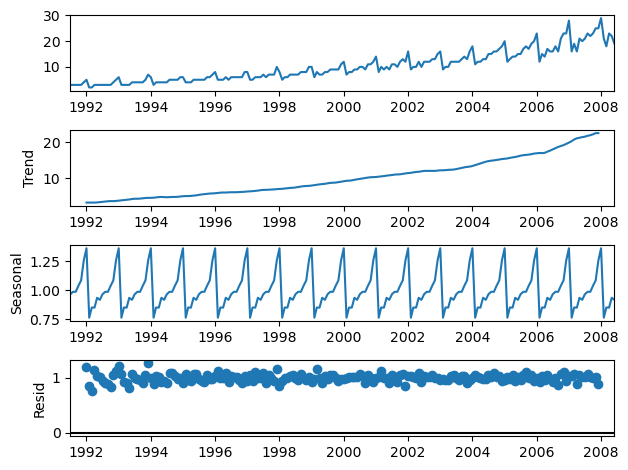

In [111]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

result = seasonal_decompose(df, model='multiplicative')
result.plot()
plt.show()

In [112]:
result.trend.unique()[:5]

array([       nan, 3.08333333, 3.08333333, 3.125     , 3.20833333])

In [113]:
result.seasonal.unique()[:5]

array([0.96572601, 0.98699046, 0.98683902, 1.03843278, 1.08544149])

In [114]:
result.resid.unique()[:5]

array([       nan, 1.18985582, 0.84974853, 0.76197728, 1.14436095])

ARIMA

Order of Autoregression (PACF Plot)
Order of Moving Average (ACF Plot)
Order of Differencing

ACF (Auto Correlation Function)
Measures correlation of the time series with it's lagged version

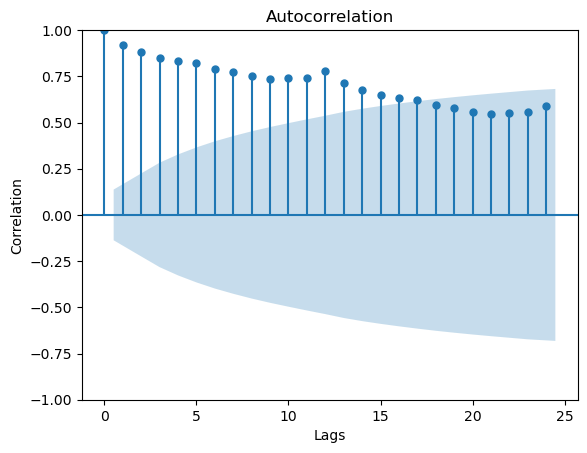

In [115]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df)
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.show()

PACF (Partial Auto Correlation Function)
The difference between ACF AND PACF is the inclusion or exclusion of correlation due to shorter lags.

ACF inclues correlation due to shorter lags

PACF EXclues correlation due to shorter lags

ACF Measures indirect and direct correaltion

PACF Measures only direct correaltion

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


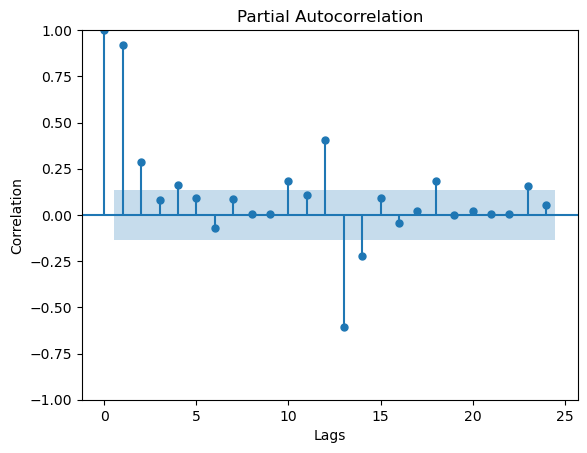

In [116]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df)
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.show()

In [117]:
from statsmodels.tsa.stattools import adfuller
# Augmented Dickey Fuller Test

result = adfuller(df)
result[1]

1.0

In [118]:
df_diff1 = df.diff().dropna()
result = adfuller(df_diff1)
result[1]

0.0677201599911849

In [119]:
df_diff2 = df_diff1.diff().dropna()
result = adfuller(df_diff2)
result[1]

2.903636878824442e-19

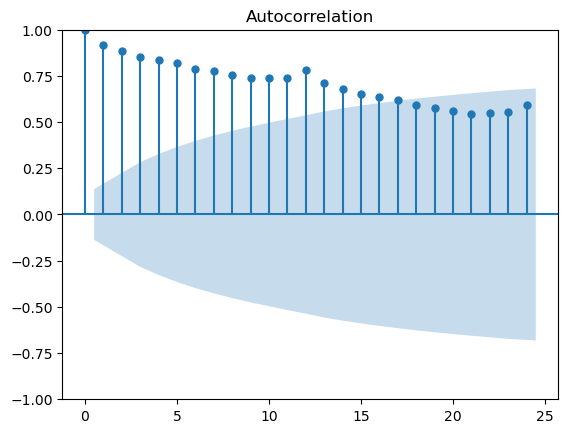

In [120]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df)
plt.show()

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


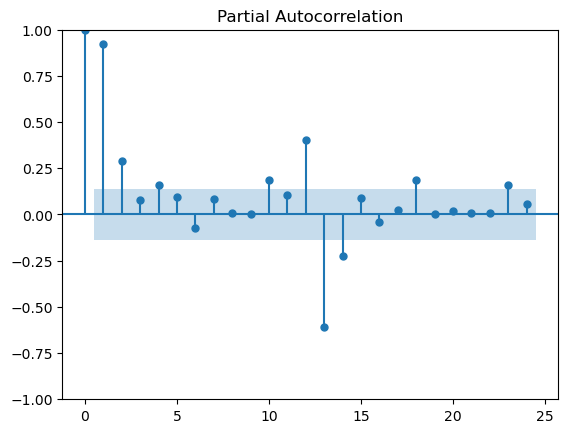

In [65]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df)
plt.show()

In [121]:
len(df)

204

In [125]:
train_len = int(len(df)*0.7)

In [126]:
train = df[:train_len]
test = df[train_len:]
len(test)

62

In [129]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train, order=(16,2,13)).fit()
fc = model.forecast(len(test))
fc[:5]

C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA param

2003-05-01    13.482659
2003-06-01    10.183646
2003-07-01    11.493920
2003-08-01    13.708236
2003-09-01    12.533608
Freq: MS, Name: predicted_mean, dtype: float64

In [130]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test, fc)

18.820351885303335

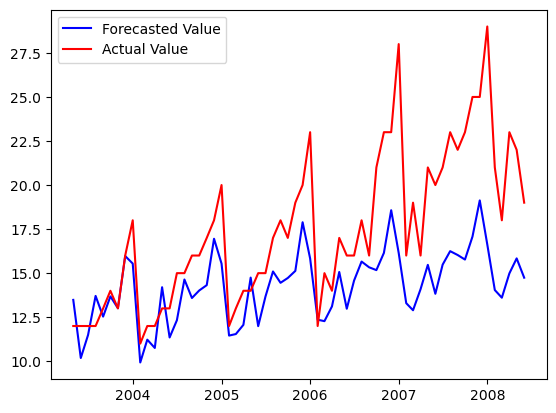

In [131]:
plt.plot(fc, color='blue', label='Forecasted Value')
plt.plot(test, color='red', label='Actual Value')
plt.legend()
plt.show()